In [5]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
#import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
#Visualize Geospatial Data
#import folium



In [8]:
#reading the data
credit_card_info = pd.read_csv('cc_info.csv')
transaction_info = pd.read_csv('transactions.csv')

In [10]:
credit_card_info.head(10)

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
5,1997929794676601,Atlanta,NY,14808,21000
6,5449610971108305,Pittsburgh,PA,15201,6000
7,7482288151831611,Birmingham,NJ,8011,4000
8,8137811493121777,Washington,NH,3280,15000
9,7804216189681274,Los Angeles,CA,90001,20000


In [11]:
transaction_info.head(10)

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
5,1003715054175576,2015-10-17 21:28:57,121.60,-80.243565,40.260887
6,1003715054175576,2015-08-29 18:34:04,122.65,-80.238186,40.245928
7,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143
8,1003715054175576,2015-09-17 19:20:37,95.20,-2.833179,34.745015
9,1003715054175576,2015-09-11 18:59:04,57.95,-80.287528,40.267874


In [17]:
#check for missing values
credit_card_info.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [16]:
transaction_info.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [14]:
credit_card_info.info()
transaction_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes:

### New merged Table

In [20]:
#merge the two data frame 
df_credit_card = transaction_info.merge(credit_card_info, on = 'credit_card')

In [25]:
df_credit_card.head(5)

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [26]:
df_credit_card.describe()

,credit_card,transaction_dollar_amount,Long,Lat,zipcode,credit_card_limit
count,2.945880e+05,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669,18073.772516,15502.053716
std,2.555803e+15,124.655954,20.135015,5.391695,23945.510551,7956.291556
min,1.003715e+15,0.010000,-179.392887,-68.046553,690.000000,2000.000000
25%,3.344214e+15,29.970000,-80.209708,40.487726,3280.000000,10000.000000
50%,5.353426e+15,58.470000,-73.199737,42.403066,5820.000000,15000.000000
75%,7.646245e+15,100.400000,-72.091933,43.180015,18612.000000,20000.000000
max,9.999757e+15,999.970000,179.917513,78.914330,98401.000000,55000.000000


In [28]:
df_credit_card.shape

(294588, 9)

In [29]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
 5   city                       294588 non-null  object 
 6   state                      294588 non-null  object 
 7   zipcode                    294588 non-null  int64  
 8   credit_card_limit          294588 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 22.5+ MB


In [30]:
df_credit_card.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

### Data Visualisation

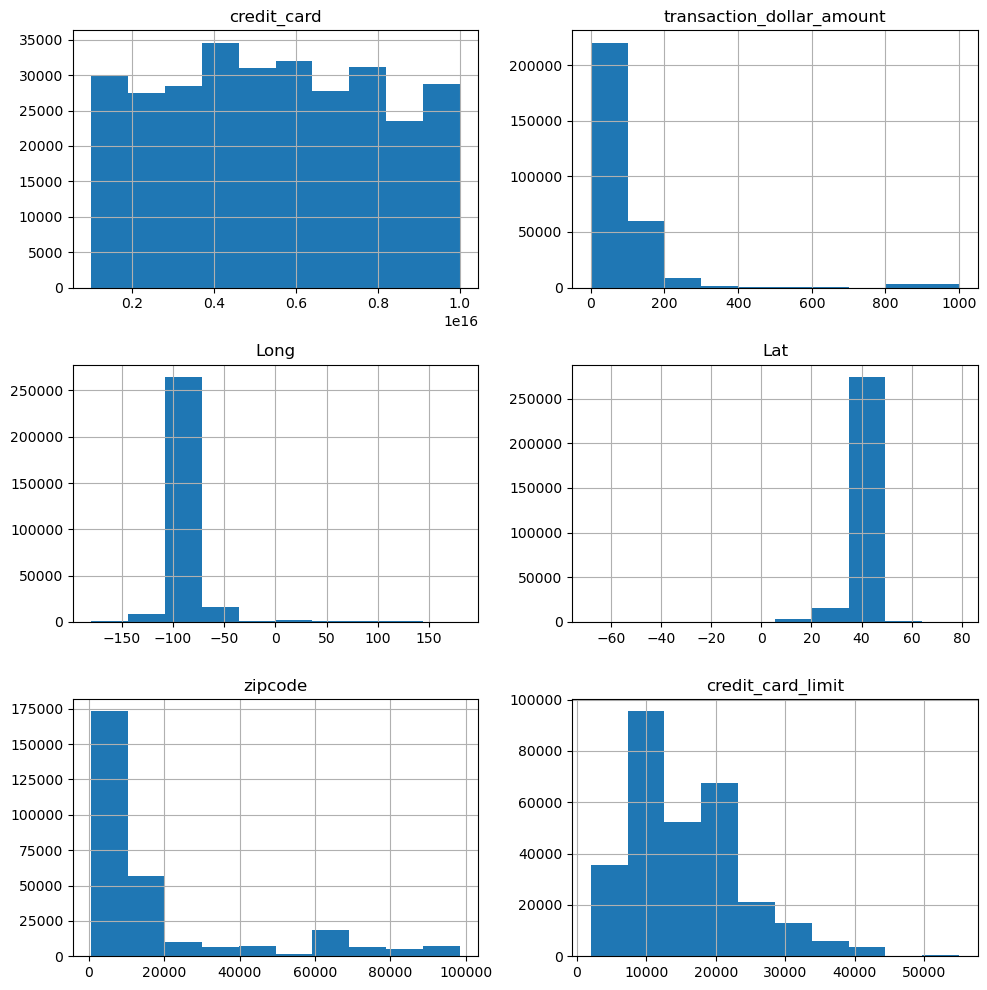

In [34]:
#histogram to see the distribution 
df_credit_card.hist(figsize=(10,10))

plt.tight_layout()
plt.show()


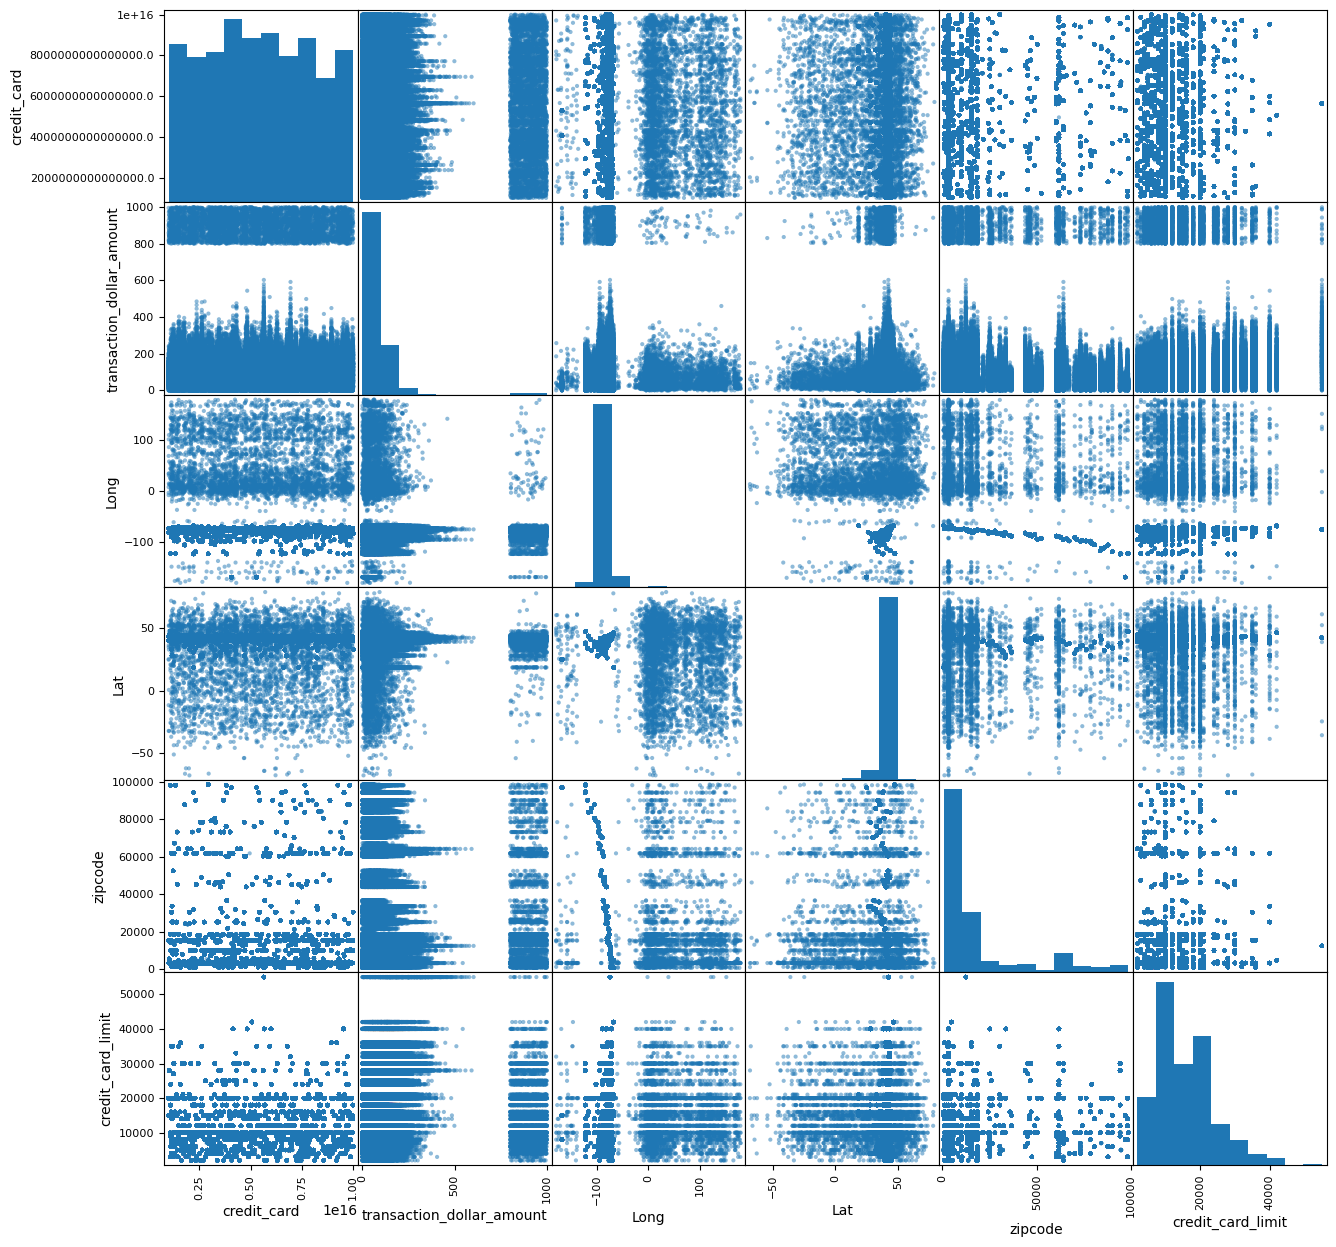

In [38]:
#scatter plot matrix
pd.plotting.scatter_matrix (df_credit_card,figsize=(15,15))
plt.show()

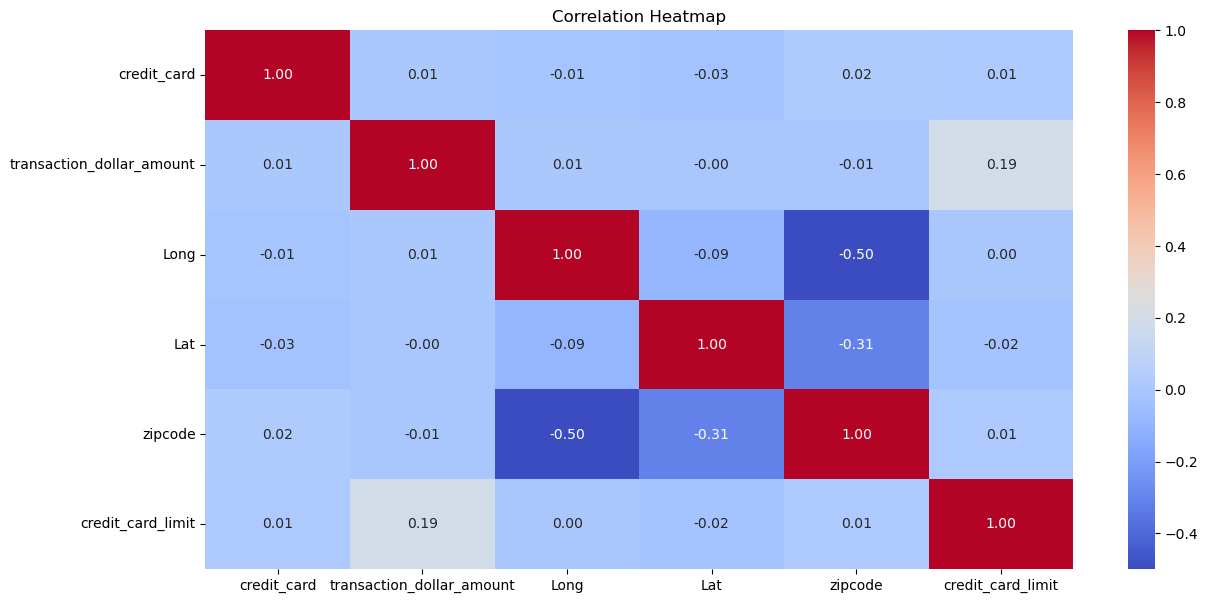

In [39]:
#Heatmap of correlation between numerical features
plt.figure(figsize=(14, 7))
sns.heatmap(df_credit_card.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#

### Insights

<AxesSubplot:>

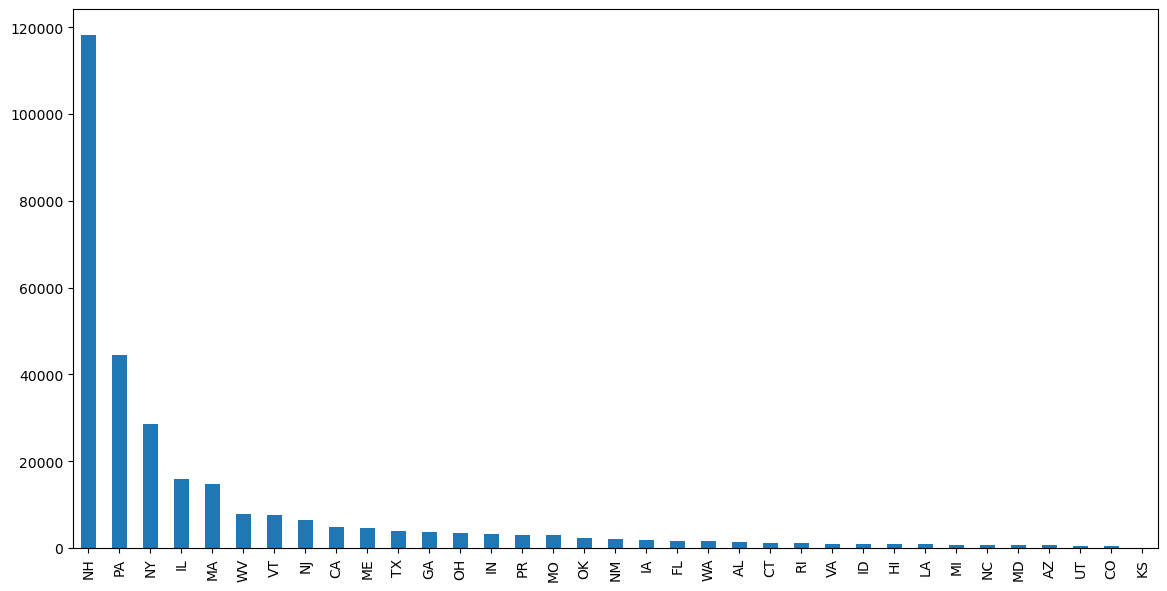

In [33]:
#number of transaction records 
df_credit_card['state'].value_counts().plot(kind='bar',  figsize = (14,7))


In [42]:
import folium
def transactions_on_map(df_credit_card):
    city_total_transactions = df_credit_card.groupby('city')['transaction_dollar_amount'].sum().reset_index()

    map_center_lat = df_credit_card['Lat'].mean()
    map_center_lon = df_credit_card['Long'].mean()
    map_osm = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=10)

    max_total_transactions = city_total_transactions['transaction_dollar_amount'].max()

    for index, row in city_total_transactions.iterrows():
        city = row['city']
        total_transactions = row['transaction_dollar_amount']

        marker_size = total_transactions / max_total_transactions * 50  # Adjust the scaling factor as needed

        popup_text = f"City: {city}<br>Total Transactions: ${total_transactions:.2f}"

        marker = folium.CircleMarker(
            location=[df_credit_card[df_credit_card['city'] == city]['Lat'].mean(), df_credit_card[df_credit_card['city'] == city]['Long'].mean()],
            radius=marker_size,
            popup=popup_text,
            tooltip=city,
            fill=True,
            fill_opacity=0.7
        )

        marker.add_to(map_osm)

    return map_osm

if __name__ == "__main__":

    map_total_transactions = transactions_on_map(df_credit_card)
    display(map_total_transactions)
#Make this Notebook Trusted to load map: File -> Trust N

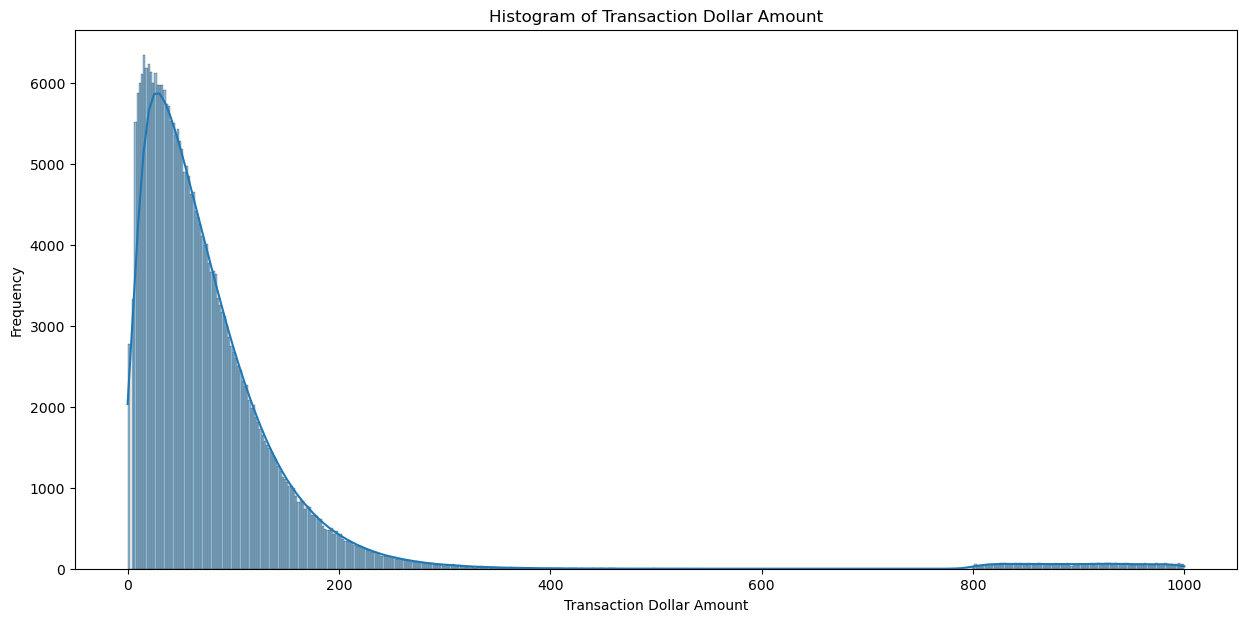

In [44]:
plt.figure(figsize=(15, 7))
sns.histplot(df_credit_card['transaction_dollar_amount'], kde=True)
plt.title('Histogram of Transaction Dollar Amount')
plt.xlabel('Transaction Dollar Amount')
plt.ylabel('Frequency')
plt.show()

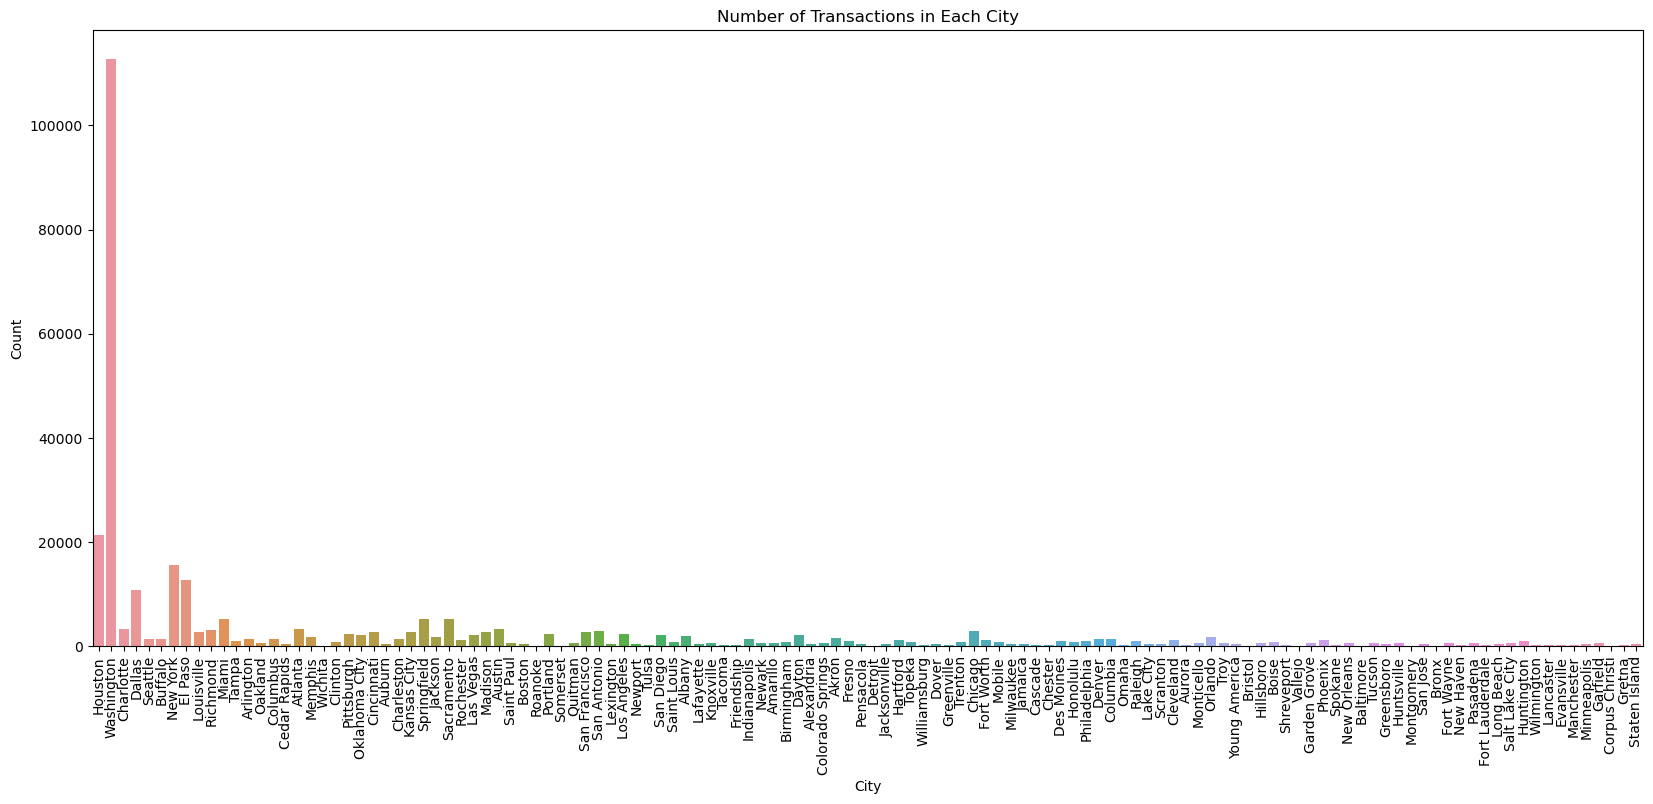

In [45]:
#Bar chart of the count of transactions in each city
plt.figure(figsize=(20, 8))
sns.countplot(data=df_credit_card, x='city')
plt.title('Number of Transactions in Each City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()   

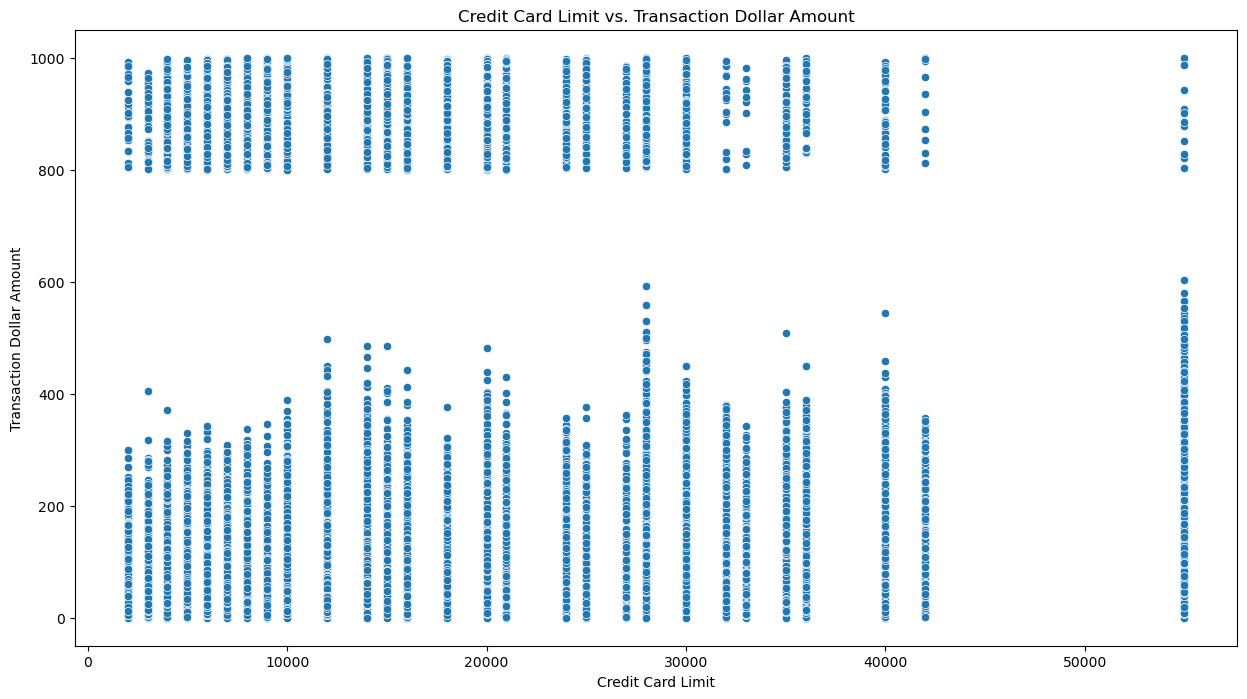

In [46]:
#'transaction_dollar_amount' vs. 'credit_card_limit'
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_credit_card, x='credit_card_limit', y='transaction_dollar_amount')
plt.title('Credit Card Limit vs. Transaction Dollar Amount')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.show()

###Building Fraud Detection Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

class ComprehensiveAnomalyDetection:

    def __init__(self, df):
        self.df = df.sort_values(by="date")
        self.feature_columns = ['transaction_dollar_amount', 'Long', 'Lat', 'credit_card_limit', 'credit_card']
        self.labels = None

    def preprocess(self):
        # One-hot encoding for credit card numbers
        self.df = pd.get_dummies(self.df, columns=['credit_card'], drop_first=True)
        
        scaler = StandardScaler()
        self.df[self.feature_columns] = scaler.fit_transform(self.df[self.feature_columns])

    def add_rolling_statistics_for_transaction_count(self, window=7):
        # Calculate the rolling count of transactions for each card
        self.df['rolling_count'] = self.df.groupby('credit_card').rolling(window=window).transaction_dollar_amount.count().reset_index(level=0, drop=True)
        
        # Calculate the mean and standard deviation for the rolling count of transactions
        self.df['rolling_count_mean'] = self.df.groupby('credit_card')['rolling_count'].transform(lambda x: x.rolling(window=window).mean())
        self.df['rolling_count_std'] = self.df.groupby('credit_card')['rolling_count'].transform(lambda x: x.rolling(window=window).std())
        
        # Identify anomalies based on the criteria: count > mean + 3*std
        self.df['count_anomaly'] = np.where(self.df['rolling_count'] > (self.df['rolling_count_mean'] + 3*self.df['rolling_count_std']), 1, 0)
        
    def kmeans_detection(self, n_clusters=2):
        kmeans = KMeans(n_clusters=n_clusters)
        self.df['cluster'] = kmeans.fit_predict(self.df[self.feature_columns])
        self.df['distance_to_center'] = np.linalg.norm(self.df[self.feature_columns].values - kmeans.cluster_centers_[self.df['cluster']], axis=1)
        threshold = np.percentile(self.df['distance_to_center'], 95)
        self.df['kmeans_anomaly'] = (self.df['distance_to_center'] > threshold).astype(int)

    def dbscan_detection(self, eps=0.5, min_samples=5):
       dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        self.df['dbscan_cluster'] = dbscan.fit_predict(self.df[self.feature_columns])
        self.df['dbscan_anomaly'] = (self.df['dbscan_cluster'] == -1).astype(int)

    def combine_anomalies(self):
        self.df['combined_anomaly'] = self.df[['kmeans_anomaly', 'dbscan_anomaly', 'count_anomaly']].max(axis=1)
        self.labels = self.df['combined_anomaly'].values

    def ensemble_models(self):
                # Splitting data
        X_train, X_test, y_train, y_test = train_test_split(self.df[self.feature_columns], self.labels, test_size=0.2)
        
        # Hyperparameter Grid for Random Forest
        param_grid_rf = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
        
        # Hyperparameter Grid for Gradient Boosting Trees
        param_grid_gbt = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.001, 0.01, 0.1],
            'max_depth': [3, 4, 5]}
        
        rf_search = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
        rf_search.fit(X_train, y_train)
        
        gbt_search = GridSearchCV(GradientBoostingClassifier(), param_grid_gbt, cv=5)
        gbt_search.fit(X_train, y_train)
        
        # Evaluate models and pick the best one
        rf_score = accuracy_score(y_test, rf_search.predict(X_test))
        gbt_score = accuracy_score(y_test, gbt_search.predict(X_test))

        if rf_score > gbt_score:
            self.labels = rf_search.predict(self.df[self.feature_columns])
        else:
            self.labels = gbt_search.predict(self.df[self.feature_columns])

    def neural_network(self):
          # Neural network
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu', input_shape=(len(self.feature_columns),)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        X_train, X_test, y_train, y_test = train_test_split(self.df[self.feature_columns], self.labels, test_size=0.2)
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])
        # Add more model evaluation steps if needed, such as saving the model, plotting the learning curve, etc.

    def visualize_insights(self):
        plt.figure(figsize=(15, 8))
        
        # Visualize distribution of transaction amounts
        sns.distplot(self.df['transaction_dollar_amount'], bins=50, color='blue', label='Distribution of Transaction Amounts')
        plt.title('Distribution of Transaction Amounts')
        plt.xlabel('Transaction Dollar Amount')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

        # Visualize transactions over time
        plt.figure(figsize=(15, 8))
        sns.lineplot(data=self.df, x='date', y='transaction_dollar_amount', hue='combined_anomaly', palette='coolwarm')
        plt.title('Transactions Over Time')
        plt.xlabel('Date')
        plt.ylabel('Transaction Dollar Amount')
        plt.show()

        # Visualize transaction counts over time
        plt.figure(figsize=(15, 8))
        transaction_counts = self.df.groupby('date').size()
        transaction_counts.plot()
        plt.title('Transaction Counts Over Time')
        plt.xlabel('Date')
        plt.ylabel('Count of Transactions')
        plt.show()

    def run(self):
        self.preprocess()
        self.add_rolling_statistics_for_transaction_count()
        self.kmeans_detection()
        self.dbscan_detection()
        self.combine_anomalies()
        self.ensemble_models()
        self.neural_network()
        self.visualize_insights()

# Usage:
# detector = ComprehensiveAnomalyDetection(dataframe)
# detector.run()
